<a href="https://colab.research.google.com/github/naomiburgess/QM2group15/blob/main/Chloropleth_map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shapely
import seaborn as sns
from datetime import datetime, timedelta
plt.style.use('seaborn')


In [2]:
#Install the geopandas module
!pip install geopandas

#Uninstall any existing version; forcing Yes
!pip uninstall --yes pysal

#Install newest branch
!pip install pysal == 2.0.0

     |████████████████████████████████| 972kB 4.2MB/s 
     |████████████████████████████████| 6.5MB 23.8MB/s 
     |████████████████████████████████| 14.8MB 294kB/s 
ERROR: Invalid requirement: '=='


In [3]:
!pip install pysal
import geopandas as gp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import pylab
import descartes

%matplotlib inline

plt.style.use('ggplot')
pylab.rcParams['figure.figsize'] = (20., 16.)

     |████████████████████████████████| 112kB 4.3MB/s 
     |████████████████████████████████| 2.4MB 9.7MB/s 
     |████████████████████████████████| 92kB 8.5MB/s 
     |████████████████████████████████| 61kB 6.9MB/s 
     |████████████████████████████████| 61kB 7.3MB/s 
     |████████████████████████████████| 92kB 9.9MB/s 
     |████████████████████████████████| 51kB 6.3MB/s 
     |████████████████████████████████| 51kB 6.9MB/s 
     |████████████████████████████████| 215kB 38.4MB/s 
     |████████████████████████████████| 5.7MB 17.5MB/s 
     |████████████████████████████████| 235kB 31.7MB/s 
     |████████████████████████████████| 235kB 26.4MB/s 
     |████████████████████████████████| 56.4MB 45.1MB/s 
     |████████████████████████████████| 1.0MB 26.0MB/s 
     |████████████████████████████████| 18.3MB 1.4MB/s 
     |████████████████████████████████| 133kB 39.7MB/s 
  Created wheel for pysal: filename=pysal-2.3.0-cp36-none-any.whl size=18421 sha256=08120da9488ad063155b4efec90755103

In [4]:

data_path = "London_Ward.shp"

# londonWards = gp.GeoDataFrame.from_file(data_path)

londonWards = gp.read_file(data_path)

londonWards.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,LB_GSS_CD,BOROUGH,POLY_ID,geometry
0,Chessington South,E05000405,755.173,0.0,E09000021,Kingston upon Thames,50840,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,Tolworth and Hook Rise,E05000414,259.464,0.0,E09000021,Kingston upon Thames,117160,"POLYGON ((517829.600 165447.100, 517837.100 16..."
2,Berrylands,E05000401,145.390,0.0,E09000021,Kingston upon Thames,50449,"POLYGON ((518107.500 167303.400, 518114.300 16..."
3,Alexandra,E05000400,268.506,0.0,E09000021,Kingston upon Thames,50456,"POLYGON ((520480.000 166909.800, 520490.700 16..."
4,Beverley,E05000402,187.821,0.0,E09000021,Kingston upon Thames,117161,"POLYGON ((522071.000 168144.900, 522063.900 16..."


In [5]:
londonWards.crs


<Projected CRS: EPSG:27700>
Name: OSGB 1936 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.0, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: OSGB 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [6]:
londonWards['geometry'].head()

0    POLYGON ((516401.600 160201.800, 516407.300 16...
1    POLYGON ((517829.600 165447.100, 517837.100 16...
2    POLYGON ((518107.500 167303.400, 518114.300 16...
3    POLYGON ((520480.000 166909.800, 520490.700 16...
4    POLYGON ((522071.000 168144.900, 522063.900 16...
Name: geometry, dtype: geometry

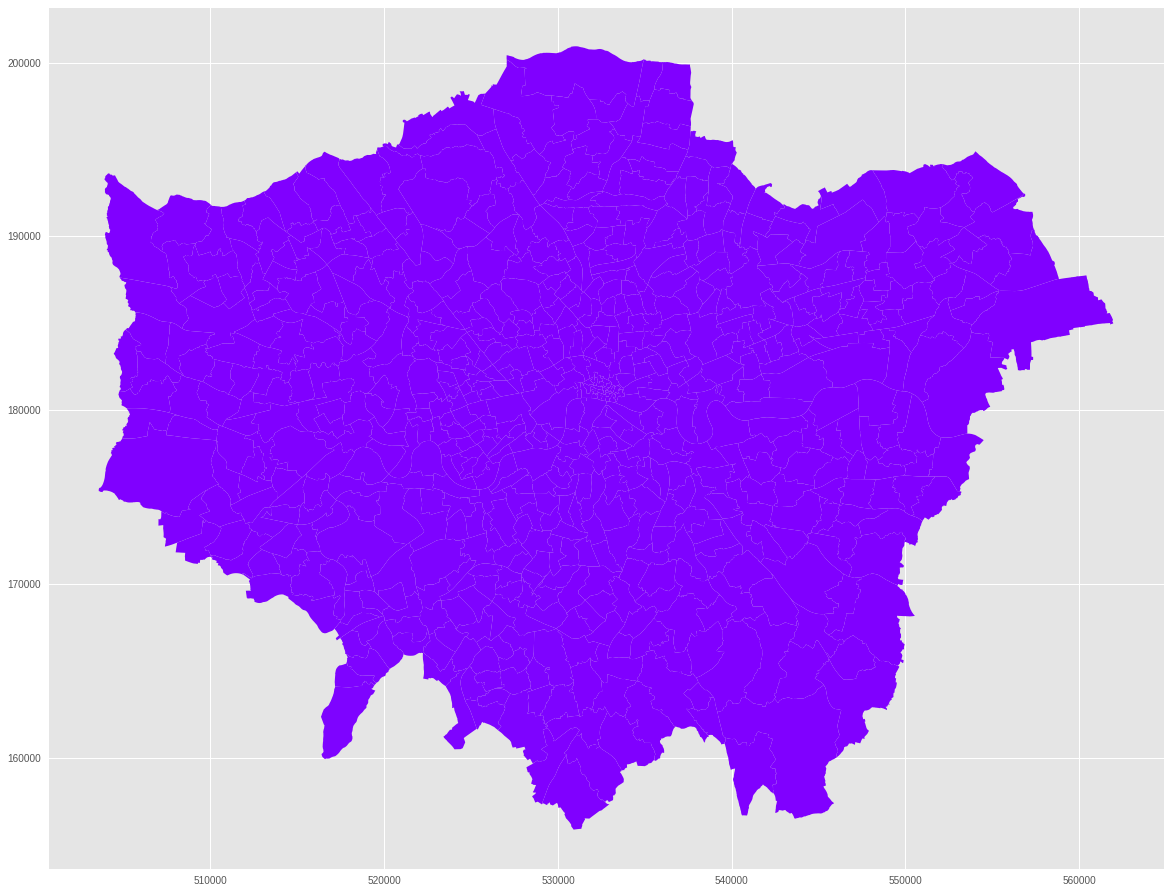

In [7]:
!pip install mapclassify
import mapclassify
londonWards.plot(column='GSS_CODE', cmap='rainbow', scheme='quantiles')

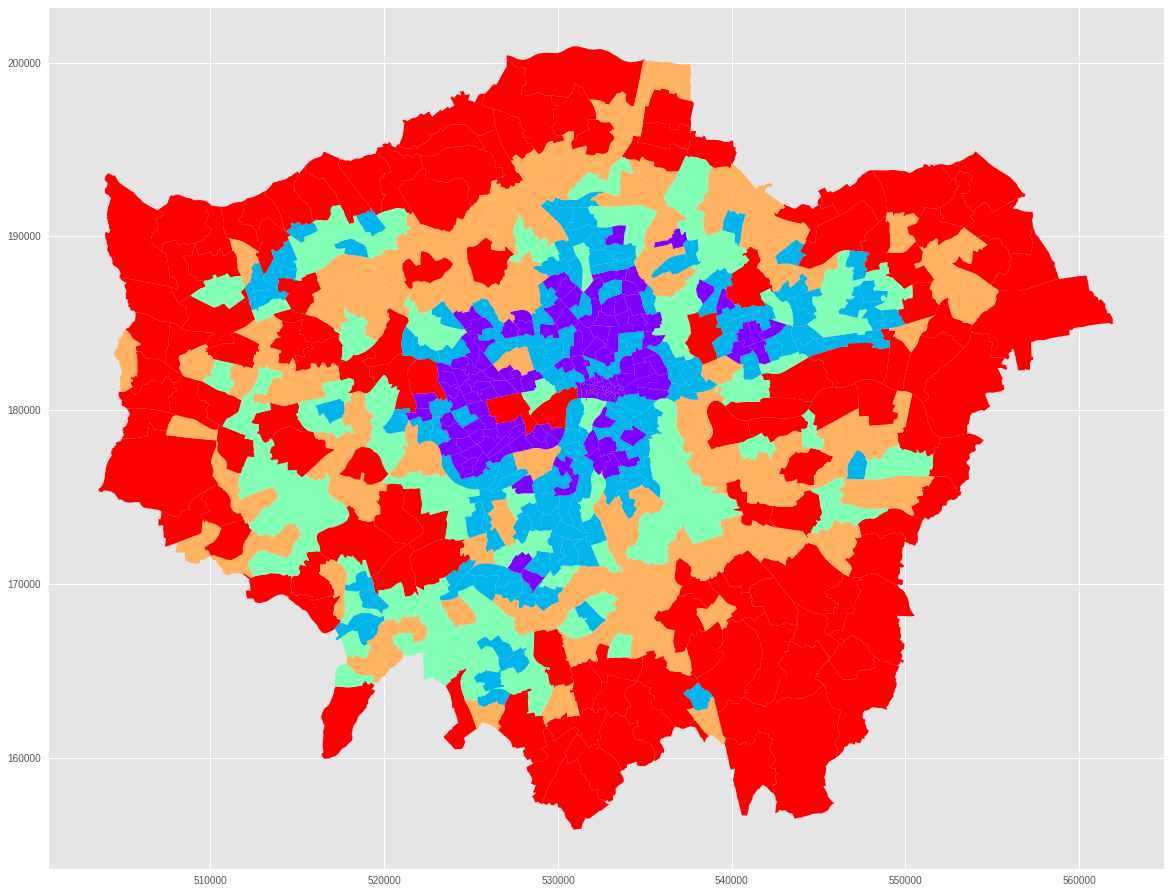

In [8]:
!pip install mapclassify
import mapclassify
londonWards.plot(column='HECTARES', cmap='rainbow', scheme='quantiles')

In [11]:
data_path = "Source1.csv"

persons = pd.read_csv(data_path, encoding = 'latin1')
persons.head()

,Unnamed: 0,Ward name,Area - Square Kilometres,Population - 2015,Working-age (16-64) - 2015,Employment rate (16-64) - 2011,Median Household income estimate (2012/13),Average Public Transport Accessibility score - 2014
0,103,Camden - Belsize,0.8,12800.0,8850.0,74.4,52680.0,4.2
1,104,Camden - Bloomsbury,1.0,11700.0,9800.0,51.4,40340.0,8.0
2,105,Camden - Camden Town with Primrose Hill,1.2,13100.0,9550.0,69.4,45840.0,5.4
3,106,Camden - Cantelowes,0.8,12450.0,9450.0,64.3,39060.0,4.9
4,107,Camden - Fortune Green,1.0,12100.0,9000.0,74.6,46800.0,4.8


In [12]:
persons.replace(',', '', regex=True, inplace=True)
persons['Population - 2015'] = persons['Population - 2015'].replace('-', 'NaN', regex=True).astype('float')
persons['Population - 2015'].head()

0    12800.0
1    11700.0
2    13100.0
3    12450.0
4    12100.0
Name: Population - 2015, dtype: float64

In [13]:
londonWards.drop(londonWards.index[londonWards['BOROUGH'] == 'Kingston upon Thames'], inplace = True)
londonWards.drop(londonWards.index[londonWards['BOROUGH'] == 'Croydon'], inplace = True)
londonWards.drop(londonWards.index[londonWards['BOROUGH'] == 'City of London'], inplace = True)
londonWards.drop(londonWards.index[londonWards['BOROUGH'] == 'Bromley'], inplace = True)
londonWards.drop(londonWards.index[londonWards['BOROUGH'] == 'Barking and Dagenham'], inplace = True)
londonWards.drop(londonWards.index[londonWards['BOROUGH'] == 'City of Westminster'], inplace = True)
londonWards.drop(londonWards.index[londonWards['BOROUGH'] == 'Hounslow'], inplace = True)
londonWards.drop(londonWards.index[londonWards['BOROUGH'] == 'Newham'], inplace = True)
londonWards.drop(londonWards.index[londonWards['BOROUGH'] == 'Hackney'], inplace = True)
londonWards.drop(londonWards.index[londonWards['BOROUGH'] == 'Islington'], inplace = True)
londonWards.drop(londonWards.index[londonWards['BOROUGH'] == 'Ealing'], inplace = True)
londonWards.drop(londonWards.index[londonWards['BOROUGH'] == 'Haringey'], inplace = True)
londonWards.drop(londonWards.index[londonWards['BOROUGH'] == 'Havering'], inplace = True)
londonWards.drop(londonWards.index[londonWards['BOROUGH'] == 'Tower Hamlets'], inplace = True)
londonWards.drop(londonWards.index[londonWards['BOROUGH'] == 'Hillingdon'], inplace = True)
londonWards.drop(londonWards.index[londonWards['BOROUGH'] == 'Harrow'], inplace = True)
londonWards.drop(londonWards.index[londonWards['BOROUGH'] == 'Brent'], inplace = True)
londonWards.drop(londonWards.index[londonWards['BOROUGH'] == 'Barnet'], inplace = True)
londonWards.drop(londonWards.index[londonWards['BOROUGH'] == 'Lambeth'], inplace = True)
londonWards.drop(londonWards.index[londonWards['BOROUGH'] == 'Southwark'], inplace = True)
londonWards.drop(londonWards.index[londonWards['BOROUGH'] == 'Lewisham'], inplace = True)
londonWards.drop(londonWards.index[londonWards['BOROUGH'] == 'Greenwich'], inplace = True)
londonWards.drop(londonWards.index[londonWards['BOROUGH'] == 'Bexley'], inplace = True)
londonWards.drop(londonWards.index[londonWards['BOROUGH'] == 'Enfield'], inplace = True)
londonWards.drop(londonWards.index[londonWards['BOROUGH'] == 'Waltham Forest'], inplace = True)
londonWards.drop(londonWards.index[londonWards['BOROUGH'] == 'Redbridge'], inplace = True)
londonWards.drop(londonWards.index[londonWards['BOROUGH'] == 'Sutton'], inplace = True)
londonWards.drop(londonWards.index[londonWards['BOROUGH'] == 'Richmond upon Thames'], inplace = True)
londonWards.drop(londonWards.index[londonWards['BOROUGH'] == 'Merton'], inplace = True)
londonWards.drop(londonWards.index[londonWards['BOROUGH'] == 'Wandsworth'], inplace = True)
londonWards.drop(londonWards.index[londonWards['BOROUGH'] == 'Hammersmith and Fulham'], inplace = True)
londonWards.drop(londonWards.index[londonWards['BOROUGH'] == 'Westminster'], inplace = True)

londonWards

,NAME,GSS_CODE,HECTARES,NONLD_AREA,LB_GSS_CD,BOROUGH,POLY_ID,geometry
460,Cremorne,E05000387,61.028,13.241,E09000020,Kensington and Chelsea,51243,"POLYGON ((526027.600 177216.200, 526067.100 17..."
461,Holland,E05000391,103.896,0.000,E09000020,Kensington and Chelsea,50661,"POLYGON ((525426.700 179502.900, 525404.600 17..."
462,Norland,E05000392,72.393,0.000,E09000020,Kensington and Chelsea,117492,"POLYGON ((523600.100 180701.400, 523604.600 18..."
463,Golborne,E05000389,94.413,0.000,E09000020,Kensington and Chelsea,50559,"POLYGON ((524230.900 181514.300, 524193.200 18..."
464,Redcliffe,E05000396,69.640,0.000,E09000020,Kensington and Chelsea,51247,"POLYGON ((525674.800 178424.600, 525683.100 17..."
465,Stanley,E05000399,66.235,0.000,E09000020,Kensington and Chelsea,117490,"POLYGON ((526523.200 178032.900, 526685.800 17..."
466,Royal Hospital,E05000397,90.143,12.753,E09000020,Kensington and Chelsea,117491,"POLYGON ((527496.500 178268.400, 527559.800 17..."
467,Brompton,E05000383,95.504,0.000,E09000020,Kensington and Chelsea,117493,"POLYGON ((526757.200 178291.800, 526667.200 17..."
468,Abingdon,E05000382,63.060,0.000,E09000020,Kensington and Chelsea,50660,"POLYGON ((525669.000 178860.700, 525604.000 17..."
469,Pembridge,E05000394,48.904,0.000,E09000020,Kensington and Chelsea,50562,"POLYGON ((524551.300 180815.200, 524554.000 18..."


In [14]:
londonWards.sort_values(by=["BOROUGH", "NAME"], inplace = True)
londonWards = londonWards.reset_index()
del londonWards['index']
londonWards

,NAME,GSS_CODE,HECTARES,NONLD_AREA,LB_GSS_CD,BOROUGH,POLY_ID,geometry
0,Belsize,E05000128,78.057,0.000,E09000007,Camden,50576,"POLYGON ((527541.800 184205.300, 527538.000 18..."
1,Bloomsbury,E05000129,102.091,0.000,E09000007,Camden,117296,"POLYGON ((528891.100 182192.600, 528900.900 18..."
2,Camden Town with Primrose Hill,E05000130,116.615,0.000,E09000007,Camden,117297,"POLYGON ((527676.900 183645.500, 527681.000 18..."
3,Cantelowes,E05000131,75.933,0.000,E09000007,Camden,117299,"POLYGON ((530121.000 184134.200, 530065.000 18..."
4,Fortune Green,E05000132,100.652,0.000,E09000007,Camden,117295,"POLYGON ((524651.100 184647.000, 524612.500 18..."
5,Frognal and Fitzjohns,E05000133,153.023,0.000,E09000007,Camden,117293,"POLYGON ((525534.300 186427.800, 525556.300 18..."
6,Gospel Oak,E05000134,69.232,0.000,E09000007,Camden,117291,"POLYGON ((528480.500 185441.400, 528489.700 18..."
7,Hampstead Town,E05000135,244.939,0.000,E09000007,Camden,117294,"POLYGON ((526902.100 185000.200, 526863.500 18..."
8,Haverstock,E05000136,73.177,0.000,E09000007,Camden,117298,"POLYGON ((527679.500 184261.400, 527671.500 18..."
9,Highgate,E05000137,323.926,0.000,E09000007,Camden,50573,"POLYGON ((526683.200 187383.700, 526684.400 18..."


In [15]:
df_joined = londonWards.merge(persons, left_index=True, right_index=True)
df_joined

,NAME,GSS_CODE,HECTARES,NONLD_AREA,LB_GSS_CD,BOROUGH,POLY_ID,geometry,Unnamed: 0,Ward name,Area - Square Kilometres,Population - 2015,Working-age (16-64) - 2015,Employment rate (16-64) - 2011,Median Household income estimate (2012/13),Average Public Transport Accessibility score - 2014
0,Belsize,E05000128,78.057,0.000,E09000007,Camden,50576,"POLYGON ((527541.800 184205.300, 527538.000 18...",103,Camden - Belsize,0.8,12800.0,8850.0,74.4,52680.0,4.2
1,Bloomsbury,E05000129,102.091,0.000,E09000007,Camden,117296,"POLYGON ((528891.100 182192.600, 528900.900 18...",104,Camden - Bloomsbury,1.0,11700.0,9800.0,51.4,40340.0,8.0
2,Camden Town with Primrose Hill,E05000130,116.615,0.000,E09000007,Camden,117297,"POLYGON ((527676.900 183645.500, 527681.000 18...",105,Camden - Camden Town with Primrose Hill,1.2,13100.0,9550.0,69.4,45840.0,5.4
3,Cantelowes,E05000131,75.933,0.000,E09000007,Camden,117299,"POLYGON ((530121.000 184134.200, 530065.000 18...",106,Camden - Cantelowes,0.8,12450.0,9450.0,64.3,39060.0,4.9
4,Fortune Green,E05000132,100.652,0.000,E09000007,Camden,117295,"POLYGON ((524651.100 184647.000, 524612.500 18...",107,Camden - Fortune Green,1.0,12100.0,9000.0,74.6,46800.0,4.8
5,Frognal and Fitzjohns,E05000133,153.023,0.000,E09000007,Camden,117293,"POLYGON ((525534.300 186427.800, 525556.300 18...",108,Camden - Frognal and Fitzjohns,1.5,12250.0,8500.0,69.8,60310.0,4.8
6,Gospel Oak,E05000134,69.232,0.000,E09000007,Camden,117291,"POLYGON ((528480.500 185441.400, 528489.700 18...",109,Camden - Gospel Oak,0.7,11500.0,7950.0,65.5,39990.0,4.1
7,Hampstead Town,E05000135,244.939,0.000,E09000007,Camden,117294,"POLYGON ((526902.100 185000.200, 526863.500 18...",110,Camden - Hampstead Town,2.5,11400.0,7550.0,76.6,62840.0,4.0
8,Haverstock,E05000136,73.177,0.000,E09000007,Camden,117298,"POLYGON ((527679.500 184261.400, 527671.500 18...",111,Camden - Haverstock,0.7,12750.0,8900.0,62.9,35730.0,4.7
9,Highgate,E05000137,323.926,0.000,E09000007,Camden,50573,"POLYGON ((526683.200 187383.700, 526684.400 18...",112,Camden - Highgate,3.2,11150.0,7500.0,70.4,47840.0,3.9


In [16]:
type(df_joined)

geopandas.geodataframe.GeoDataFrame

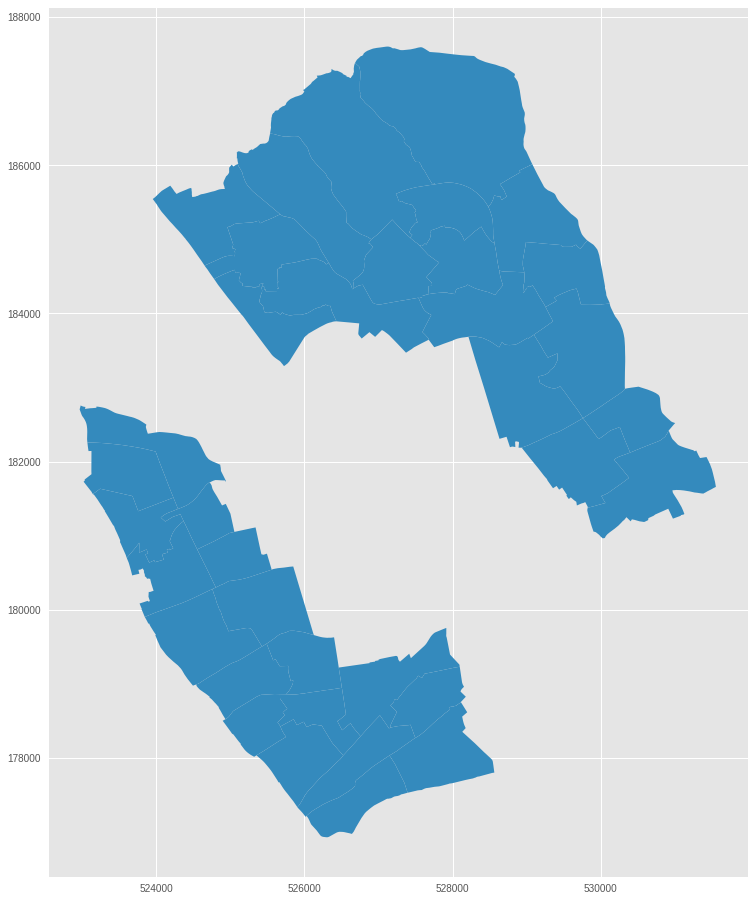

In [17]:
df_joined.plot()

In [18]:
crime_data = "Source8.csv"
crime = pd.read_csv(crime_data)

In [19]:

from shapely.geometry import Point
crime["geometry"] = crime.apply(lambda x:Point(x["Longitude"], x["Latitude"]), axis=1)
crime = gp.GeoDataFrame(crime)

In [20]:
crime = crime.set_crs(epsg=4326)

In [21]:
crime = crime.to_crs("EPSG:27700")

In [22]:
crime.head()

,Unnamed: 0,Month,Longitude,Latitude,Location,LSOA name,Crime type,geometry
0,0,2017-12,-0.143286,51.563776,On or near Chester Road,Camden 001B,Bicycle theft,POINT (528794.987 186621.961)
1,1,2017-12,-0.143286,51.563776,On or near Chester Road,Camden 001B,Other theft,POINT (528794.987 186621.961)
2,2,2017-12,-0.147903,51.563058,On or near Bromwich Avenue,Camden 001B,Theft from the person,POINT (528477.006 186534.002)
3,3,2017-12,-0.150701,51.562374,On or near St Anne'S Close,Camden 001C,Other theft,POINT (528284.998 186453.030)
4,4,2017-12,-0.150701,51.562374,On or near St Anne'S Close,Camden 001C,Theft from the person,POINT (528284.998 186453.030)


In [23]:
type(crime)

geopandas.geodataframe.GeoDataFrame

In [24]:
crime.to_file('crimelocation.shp', driver='ESRI Shapefile')

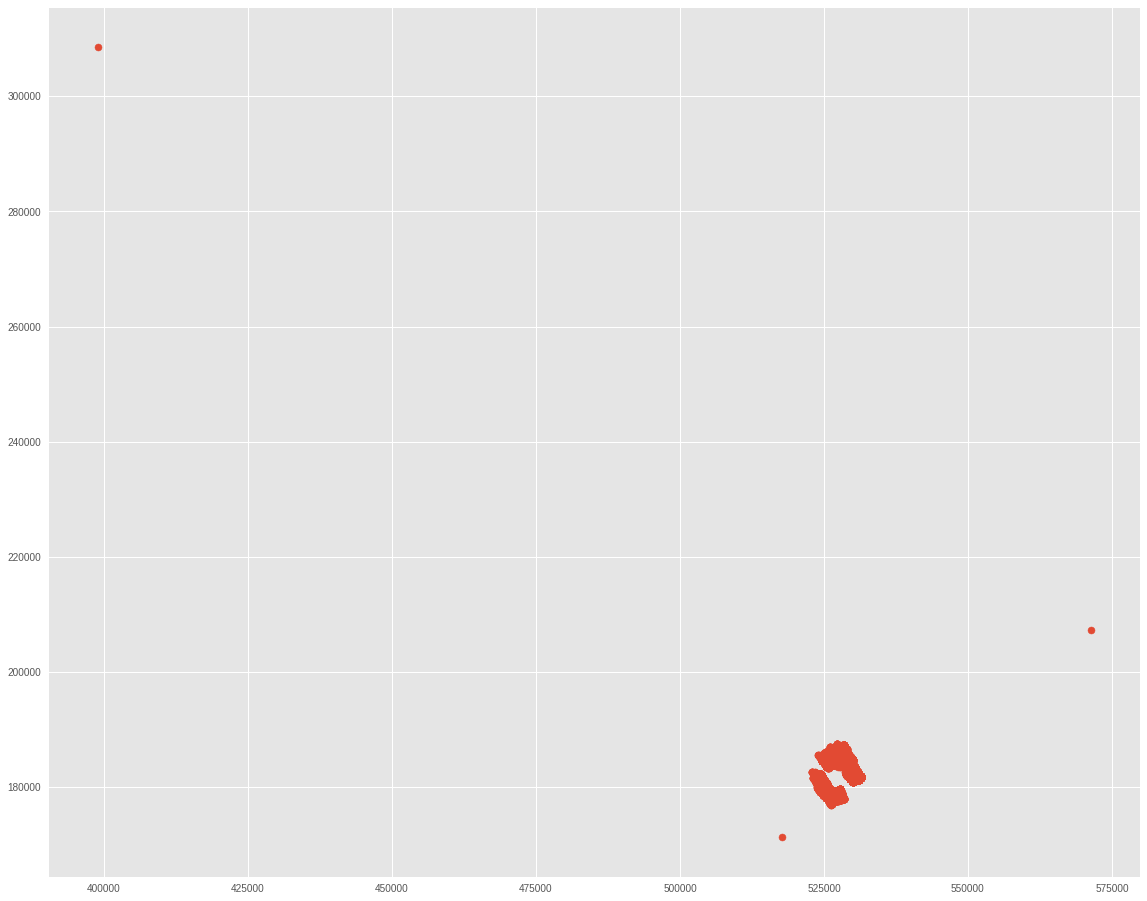

In [25]:
crime.plot()

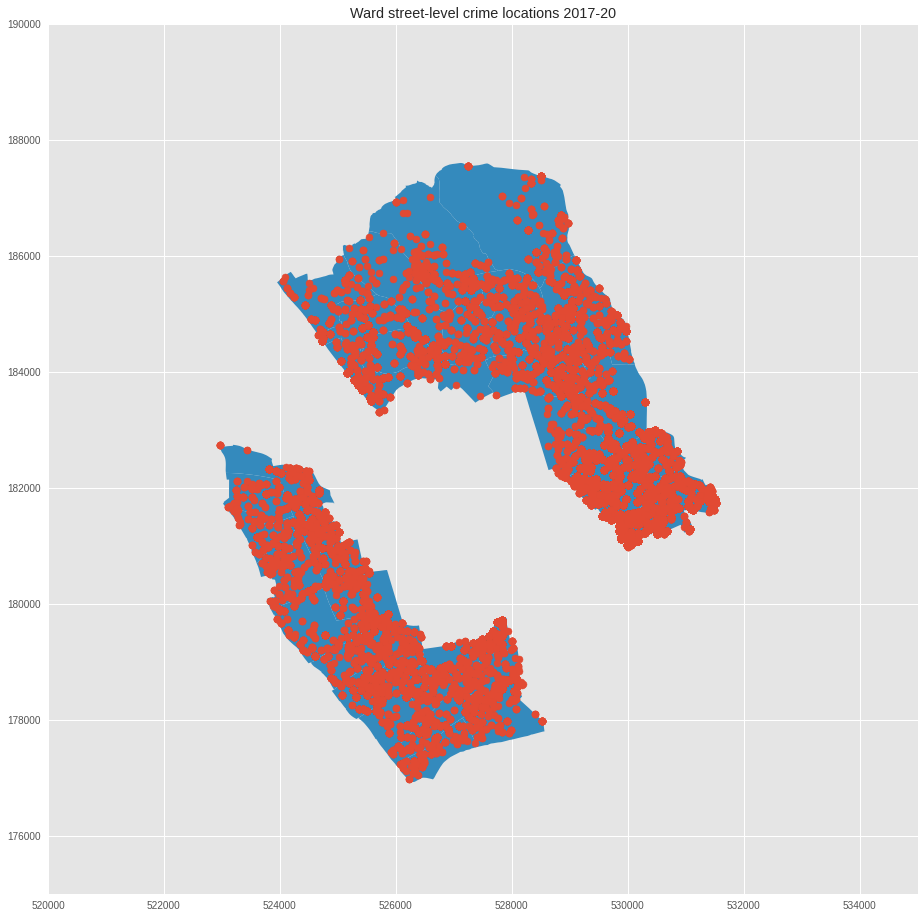

In [26]:
ax = df_joined.plot()
plt.title('Ward street-level crime locations 2017-20')
plt.xlim(520000,535000)
plt.ylim(175000,190000)


crime.plot(ax=ax).get_figure().savefig('crimelocation.png')

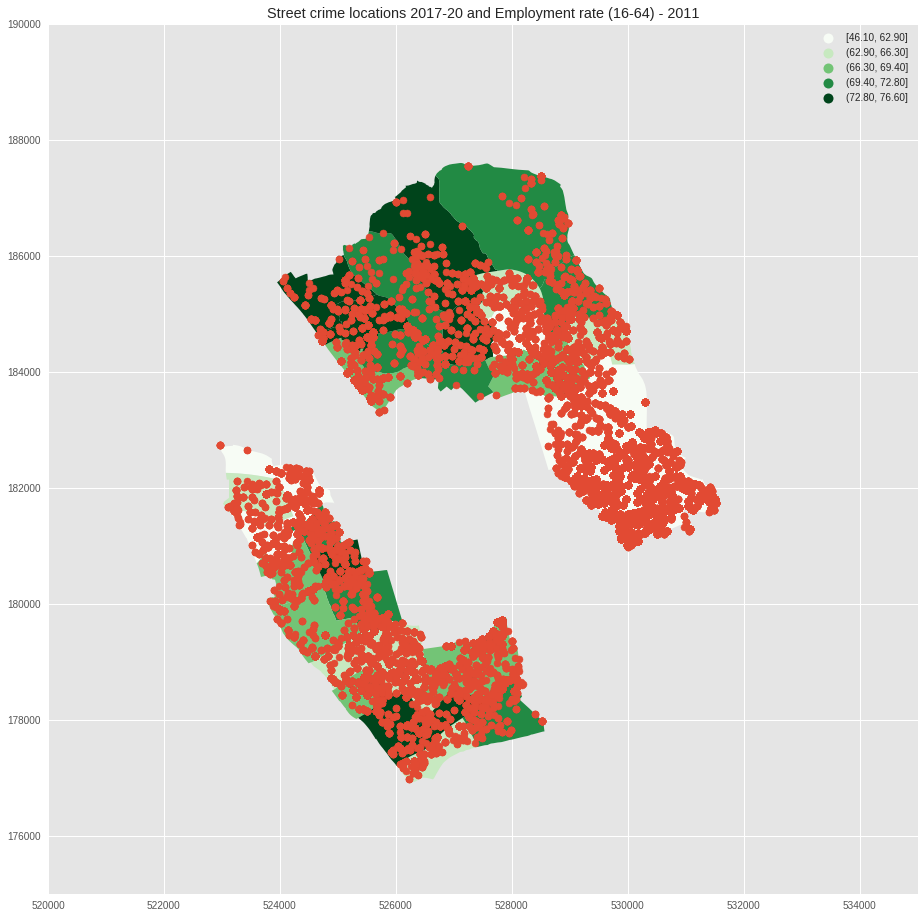

In [27]:
ax = df_joined.plot(column='Employment rate (16-64) - 2011', cmap='Greens', scheme='quantiles', k=5, legend=True)
plt.title('Street crime locations 2017-20 and Employment rate (16-64) - 2011')
plt.xlim(520000,535000)
plt.ylim(175000,190000)


crime.plot(ax=ax).get_figure().savefig('crimelocation_employment.png')

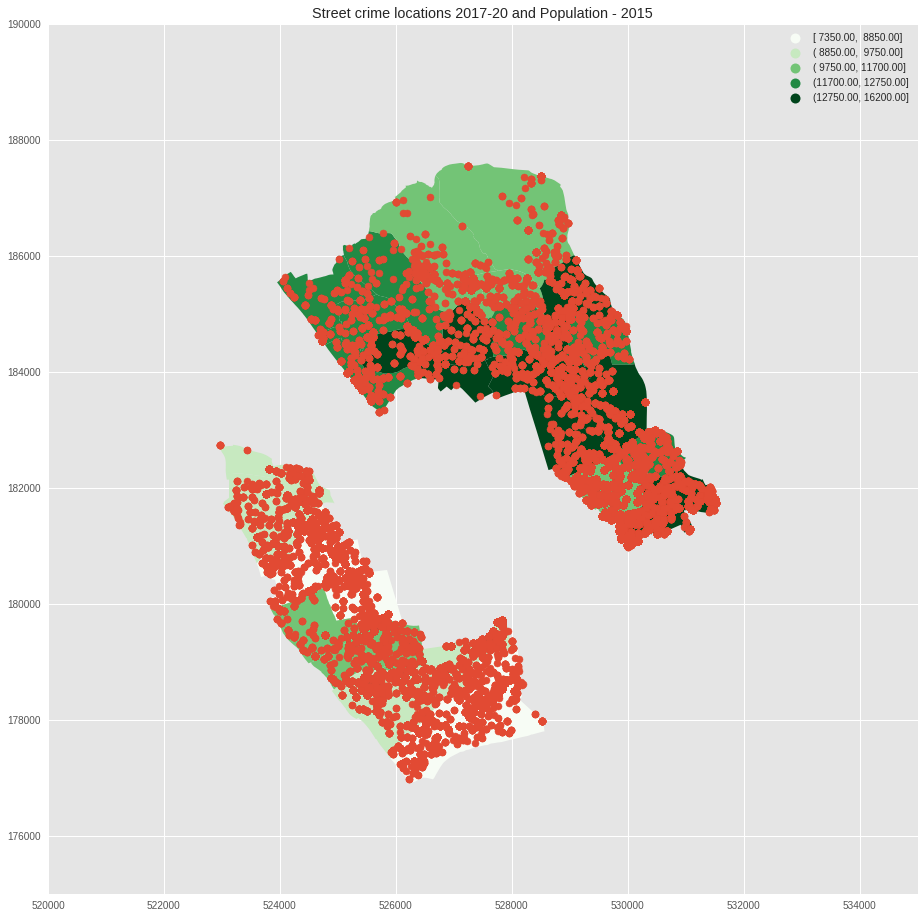

In [28]:
ax = df_joined.plot(column='Population - 2015', cmap='Greens', scheme='quantiles', k=5, legend=True)
plt.title('Street crime locations 2017-20 and Population - 2015')
plt.xlim(520000,535000)
plt.ylim(175000,190000)


crime.plot(ax=ax).get_figure().savefig('crimelocation_population.png')

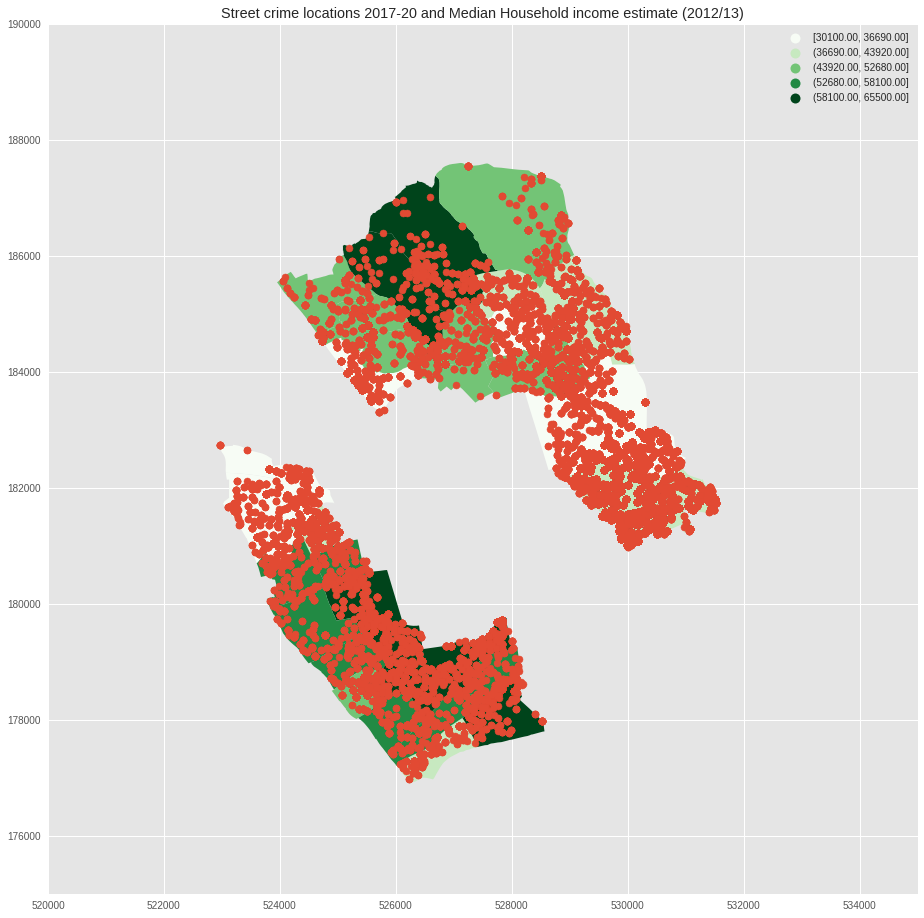

In [29]:
ax = df_joined.plot(column='Median Household income estimate (2012/13)', cmap='Greens', scheme='quantiles', k=5, legend=True)
plt.title('Street crime locations 2017-20 and Median Household income estimate (2012/13)')
plt.xlim(520000,535000)
plt.ylim(175000,190000)


crime.plot(ax=ax).get_figure().savefig('crimelocation_medianincome.png')

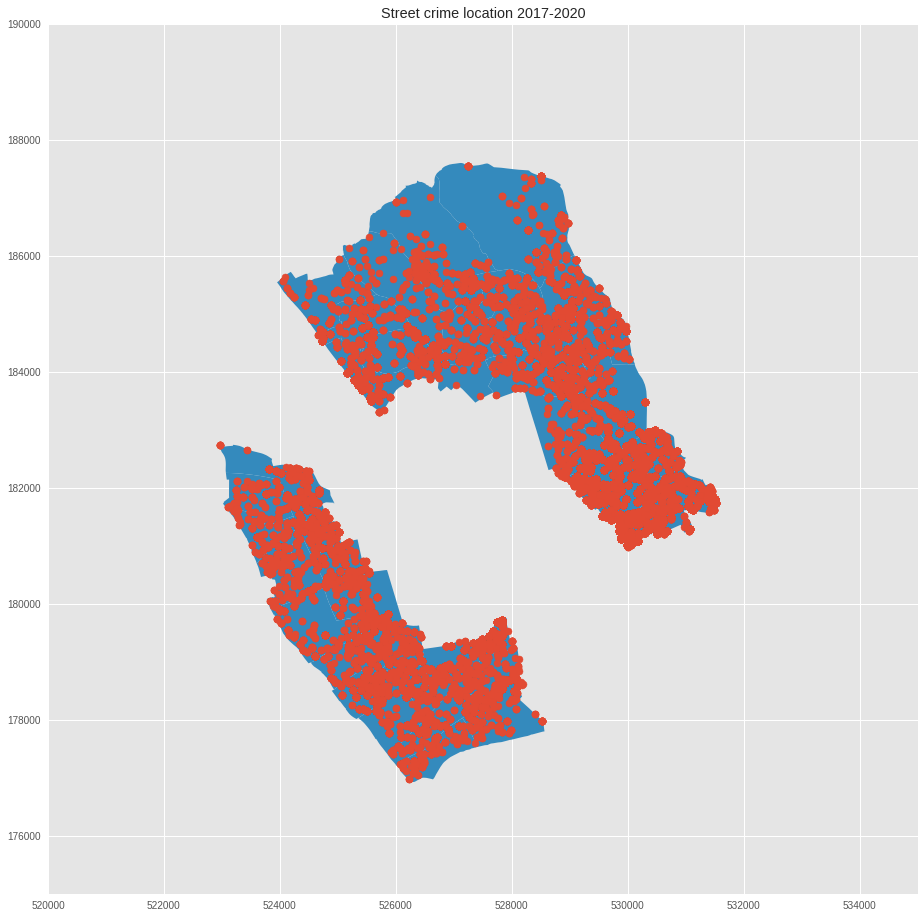

In [30]:
ax = df_joined.plot(legend=True)
plt.title('Street crime location 2017-2020')
plt.xlim(520000,535000)
plt.ylim(175000,190000)


crime.plot(ax=ax).get_figure().savefig('crimelocation.png')

In [31]:
data_two = "Source1_1.csv"

hello = pd.read_csv(data_two, encoding = 'latin1')
hello.head()

,Unnamed: 0,Ward name,Area - Square Kilometres,Population - 2015,Working-age (16-64) - 2015,Employment rate (16-64) - 2011,Median Household income estimate (2012/13),Average Public Transport Accessibility score - 2014,Crime rate - 2014/15
0,103,Camden - Belsize,0.8,12800.0,8850.0,74.4,52680.0,4.2,60.9
1,104,Camden - Bloomsbury,1.0,11700.0,9800.0,51.4,40340.0,8.0,314.1
2,105,Camden - Camden Town with Primrose Hill,1.2,13100.0,9550.0,69.4,45840.0,5.4,297.0
3,106,Camden - Cantelowes,0.8,12450.0,9450.0,64.3,39060.0,4.9,82.5
4,107,Camden - Fortune Green,1.0,12100.0,9000.0,74.6,46800.0,4.8,54.2


In [32]:
hello.replace(',', '', regex=True, inplace=True)
hello['Population - 2015'] = persons['Population - 2015'].replace('-', 'NaN', regex=True).astype('float')
hello['Population - 2015'].head()

0    12800.0
1    11700.0
2    13100.0
3    12450.0
4    12100.0
Name: Population - 2015, dtype: float64

In [33]:
df_two = londonWards.merge(hello, left_index=True, right_index=True)
df_two

,NAME,GSS_CODE,HECTARES,NONLD_AREA,LB_GSS_CD,BOROUGH,POLY_ID,geometry,Unnamed: 0,Ward name,Area - Square Kilometres,Population - 2015,Working-age (16-64) - 2015,Employment rate (16-64) - 2011,Median Household income estimate (2012/13),Average Public Transport Accessibility score - 2014,Crime rate - 2014/15
0,Belsize,E05000128,78.057,0.000,E09000007,Camden,50576,"POLYGON ((527541.800 184205.300, 527538.000 18...",103,Camden - Belsize,0.8,12800.0,8850.0,74.4,52680.0,4.2,60.9
1,Bloomsbury,E05000129,102.091,0.000,E09000007,Camden,117296,"POLYGON ((528891.100 182192.600, 528900.900 18...",104,Camden - Bloomsbury,1.0,11700.0,9800.0,51.4,40340.0,8.0,314.1
2,Camden Town with Primrose Hill,E05000130,116.615,0.000,E09000007,Camden,117297,"POLYGON ((527676.900 183645.500, 527681.000 18...",105,Camden - Camden Town with Primrose Hill,1.2,13100.0,9550.0,69.4,45840.0,5.4,297.0
3,Cantelowes,E05000131,75.933,0.000,E09000007,Camden,117299,"POLYGON ((530121.000 184134.200, 530065.000 18...",106,Camden - Cantelowes,0.8,12450.0,9450.0,64.3,39060.0,4.9,82.5
4,Fortune Green,E05000132,100.652,0.000,E09000007,Camden,117295,"POLYGON ((524651.100 184647.000, 524612.500 18...",107,Camden - Fortune Green,1.0,12100.0,9000.0,74.6,46800.0,4.8,54.2
5,Frognal and Fitzjohns,E05000133,153.023,0.000,E09000007,Camden,117293,"POLYGON ((525534.300 186427.800, 525556.300 18...",108,Camden - Frognal and Fitzjohns,1.5,12250.0,8500.0,69.8,60310.0,4.8,56.7
6,Gospel Oak,E05000134,69.232,0.000,E09000007,Camden,117291,"POLYGON ((528480.500 185441.400, 528489.700 18...",109,Camden - Gospel Oak,0.7,11500.0,7950.0,65.5,39990.0,4.1,65.8
7,Hampstead Town,E05000135,244.939,0.000,E09000007,Camden,117294,"POLYGON ((526902.100 185000.200, 526863.500 18...",110,Camden - Hampstead Town,2.5,11400.0,7550.0,76.6,62840.0,4.0,82.9
8,Haverstock,E05000136,73.177,0.000,E09000007,Camden,117298,"POLYGON ((527679.500 184261.400, 527671.500 18...",111,Camden - Haverstock,0.7,12750.0,8900.0,62.9,35730.0,4.7,87.6
9,Highgate,E05000137,323.926,0.000,E09000007,Camden,50573,"POLYGON ((526683.200 187383.700, 526684.400 18...",112,Camden - Highgate,3.2,11150.0,7500.0,70.4,47840.0,3.9,81.0


(175000.0, 190000.0)

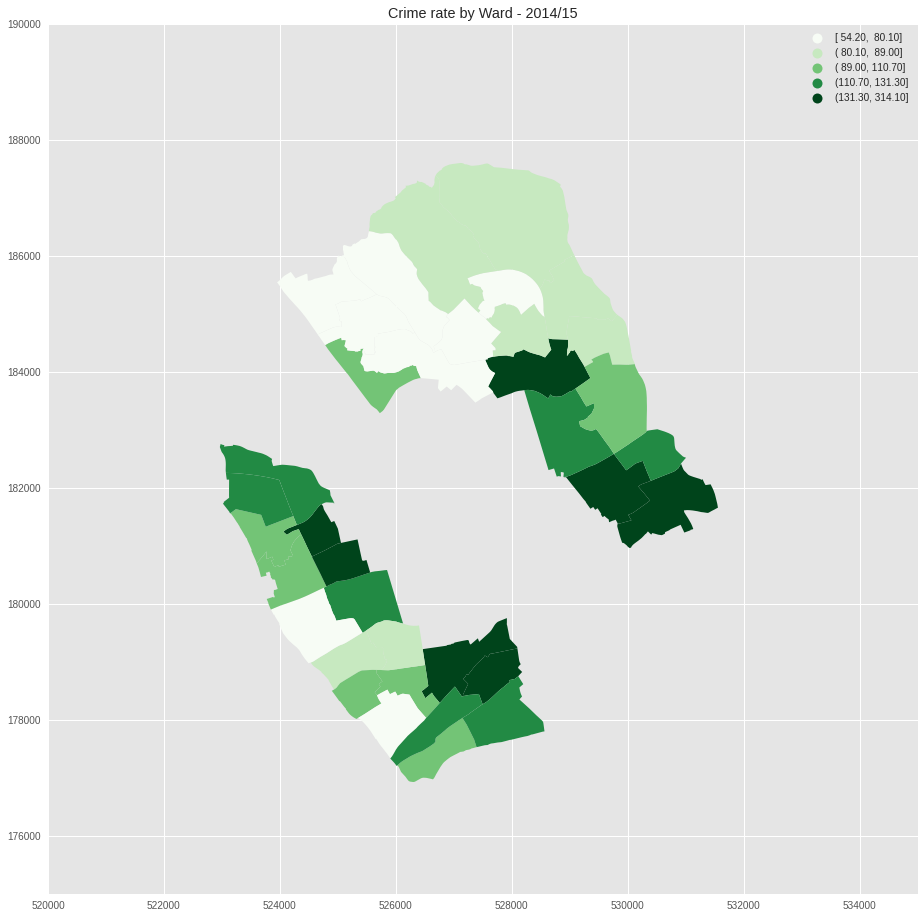

In [34]:

df_two.plot(column='Crime rate - 2014/15', cmap='Greens', scheme='quantiles', k=5, legend=True).get_figure().savefig('crimerate.png')
plt.title('Crime rate by Ward - 2014/15')
plt.xlim(520000,535000)
plt.ylim(175000,190000)

In [35]:
from shapely import wkt

In [36]:
camden_amenity = "ken and chel bar test.csv"
file1 = pd.read_csv(camden_amenity, encoding = 'latin1')

file1.head()

,WKT,full_id,osm_id,osm_type,addr_house,addr_stree,amenity,name,addr_city,addr_postc
0,MULTIPOINT ((-0.1660877 51.4952634)),n302397766,302397766,node,35,Walton Street,bar,The Enterprise,NaN,NaN
1,MULTIPOINT ((-0.194451900000011 51.5092674)),n387123683,387123683,node,19,Notting Hill Gate,bar,Tequila Tex-Mex,NaN,NaN
2,MULTIPOINT ((-0.1823815 51.4938009)),n1360505700,1360505700,node,140,Gloucester Road,bar,Olives Bar,NaN,NaN
3,MULTIPOINT ((-0.1738462 51.4855925)),n1368258354,1368258354,node,316-318,King's Road,bar,JuJu,NaN,SW3 5UH
4,MULTIPOINT ((-0.1851071 51.4803616)),n1903127186,1903127186,node,NaN,NaN,bar,Rumi,NaN,NaN


In [37]:
camden_amenity1 = "ken and chel cafe 3.csv"
file2 = pd.read_csv(camden_amenity1, encoding = 'latin1')

file2.head()

,WKT,full_id,osm_id,osm_type,amenity,name,addr_house,addr_stree,addr_city,addr_postc
0,MULTIPOINT ((-0.1920466 51.4890109)),n273933958,273933958,node,cafe,Costa,270-272,Old Brompton Road,NaN,NaN
1,MULTIPOINT ((-0.190455900000012 51.4899927)),n273933965,273933965,node,cafe,CaffÃ¨ du Coin,229,Earl's Court Road,NaN,NaN
2,MULTIPOINT ((-0.18011980000001 51.491428)),n300425855,300425855,node,cafe,Gloucester Road Cafe,163,Gloucester Road,NaN,NaN
3,MULTIPOINT ((-0.19796370000001 51.5099573)),n313100914,313100914,node,cafe,Taxi Driver's Cafe,NaN,NaN,NaN,NaN
4,MULTIPOINT ((-0.1955016 51.4876475)),n389188993,389188993,node,cafe,Stella Coffee,348,Old Brompton Road,NaN,NaN


In [38]:
camden_amenity2 = "ken and chel cinema 3.csv"
file3 = pd.read_csv(camden_amenity2, encoding = 'latin1')

file3.head()

,WKT,full_id,osm_id,osm_type,amenity,name,addr_house,addr_stree,addr_postc
0,MULTIPOINT ((-0.1730899 51.4855596)),n498694180,498694180,node,cinema,Cineworld,NaN,NaN,NaN
1,MULTIPOINT ((-0.1771484 51.4945283)),n7930695624,7930695624,node,cinema,CinÃ© LumiÃ¨re,17.0,Queensbury Place,SW7 2DT


In [39]:
camden_amenity3 = "ken and chel fast food 3.csv"
file4 = pd.read_csv(camden_amenity3, encoding = 'latin1')

file4.head()

,WKT,full_id,osm_id,osm_type,addr_house,addr_stree,amenity,name,addr_city,addr_postc
0,MULTIPOINT ((-0.1763505 51.492946)),n300413465,300413465,node,65,Old Brompton Road,fast_food,Beirut Express,NaN,NaN
1,MULTIPOINT ((-0.194873 51.509186)),n387121713,387121713,node,31,Notting Hill Gate,fast_food,Subway,NaN,NaN
2,MULTIPOINT ((-0.1955739 51.4876223)),n389472394,389472394,node,350,Old Brompton Road,fast_food,Pizza@home,NaN,NaN
3,MULTIPOINT ((-0.1924246 51.5007273)),n391097329,391097329,node,NaN,NaN,fast_food,M&S to go,NaN,NaN
4,MULTIPOINT ((-0.1619417 51.4902402)),n444285242,444285242,node,41,Kingâs Road,fast_food,Pret A Manger,London,SW3 4


In [40]:
camden_amenity4 = "ken and chel cinema 3.csv"
file5 = pd.read_csv(camden_amenity4, encoding = 'latin1')

file5.head()

,WKT,full_id,osm_id,osm_type,amenity,name,addr_house,addr_stree,addr_postc
0,MULTIPOINT ((-0.1730899 51.4855596)),n498694180,498694180,node,cinema,Cineworld,NaN,NaN,NaN
1,MULTIPOINT ((-0.1771484 51.4945283)),n7930695624,7930695624,node,cinema,CinÃ© LumiÃ¨re,17.0,Queensbury Place,SW7 2DT


In [41]:
camden_amenity5 = "ken and chel nightclub 3.csv"
file6 = pd.read_csv(camden_amenity5, encoding = 'latin1')

file6.head()

,WKT,full_id,osm_id,osm_type,amenity,name,addr_house,addr_stree,addr_city,addr_postc
0,MULTIPOINT ((-0.1944375 51.5092409)),n2244810458,2244810458,node,nightclub,Notting Hill Arts Club,21,Notting Hill Gate,NaN,NaN
1,MULTIPOINT ((-0.1875507 51.5021504)),n3868765589,3868765589,node,nightclub,Jako London,1,Kensington High Street,London,W8 5NP
2,MULTIPOINT ((-0.1877803 51.5025449)),n4177285145,4177285145,node,nightclub,Bodo's Schloss,2a,Kensington High Street,London,W8 4PT
3,MULTIPOINT ((-0.187828700000011 51.5026519)),n7103266996,7103266996,node,nightclub,Bloom,NaN,NaN,NaN,NaN
4,MULTIPOINT ((-0.2004924 51.5166639)),n7194787125,7194787125,node,nightclub,The Globe,103,Talbot Road,NaN,NaN


In [42]:
camden_amenity6 = "ken and chel pub 3.csv"
file7 = pd.read_csv(camden_amenity6, encoding = 'latin1')

file7.head()

,WKT,full_id,osm_id,osm_type,addr_house,addr_postc,addr_stree,amenity,name,addr_city
0,MULTIPOINT ((-0.1832636 51.4776679)),n27512718,27512718,node,114,NaN,Lots Road,pub,Lots Road,NaN
1,MULTIPOINT ((-0.1975022 51.5095361)),n30592674,30592674,node,11,NaN,Pembridge Road,pub,Prince Albert,London
2,MULTIPOINT ((-0.190468899999987 51.4895894)),n59169435,59169435,node,326,SW5 9BQ,Old Brompton Road,pub,The Bolton,London
3,MULTIPOINT ((-0.1833309 51.4906972)),n232337015,232337015,node,NaN,NaN,NaN,NaN,NaN,NaN
4,MULTIPOINT ((-0.172970699999988 51.4859699)),n280835217,280835217,node,298,NaN,Old Church Street,pub,The Cadogan Arms,NaN


In [43]:
camden_amenity7 = "ken and chel restaurant 3.csv"
file8 = pd.read_csv(camden_amenity7, encoding = 'latin1')

file8.head()

,WKT,full_id,osm_id,osm_type,addr_house,addr_stree,amenity,name,addr_city,addr_postc
0,MULTIPOINT ((-0.166420899999987 51.4983961)),n277337382,277337382,node,152,Brompton Road,restaurant,Caffe Concerto,NaN,NaN
1,MULTIPOINT ((-0.1695887 51.4833439)),n280835741,280835741,node,NaN,NaN,restaurant,Cheyne Walk Brasserie,NaN,NaN
2,MULTIPOINT ((-0.1779171 51.4921687)),n300413446,300413446,node,107,Old Brompton Road,restaurant,Gourmet Burger Kitchen,NaN,NaN
3,MULTIPOINT ((-0.176049200000011 51.4931045)),n300413484,300413484,node,53,Old Brompton Road,restaurant,Gá»,NaN,NaN
4,MULTIPOINT ((-0.175681 51.4937726)),n300425781,300425781,node,6,Glendower Place,restaurant,Papa Roma,NaN,NaN


In [44]:
camden_amenity8 = "ken and chel station 3.csv"
file9 = pd.read_csv(camden_amenity8, encoding = 'latin1')

file9.head()

,WKT,full_id,osm_id,osm_type,name,public_tra,railway,station,addr_postc,addr_stree,addr_city
0,MULTIPOINT ((-0.1561319 51.4922674)),n15026054,15026054,node,Sloane Square,station,station,subway,NaN,NaN,NaN
1,MULTIPOINT ((-0.1951854 51.4869765)),n5182384969,5182384969,node,West Brompton,station,station,subway,NaN,NaN,NaN
2,MULTIPOINT ((-0.1730439 51.4940494)),n5183897519,5183897519,node,South Kensington,station,station,subway,NaN,NaN,NaN
3,MULTIPOINT ((-0.1961978 51.5089252)),n5207201516,5207201516,node,Notting Hill Gate,station,station,subway,NaN,NaN,NaN
4,MULTIPOINT ((-0.2094954 51.497437)),n6091112768,6091112768,node,Kensington (Olympia),station,station,subway,W14 0NE,Olympia Way,NaN


In [45]:
camden_amenity9 = "ken and chel theatre 3.csv"
file10 = pd.read_csv(camden_amenity9, encoding = 'latin1')

file1.head()

,WKT,full_id,osm_id,osm_type,addr_house,addr_stree,amenity,name,addr_city,addr_postc
0,MULTIPOINT ((-0.1660877 51.4952634)),n302397766,302397766,node,35,Walton Street,bar,The Enterprise,NaN,NaN
1,MULTIPOINT ((-0.194451900000011 51.5092674)),n387123683,387123683,node,19,Notting Hill Gate,bar,Tequila Tex-Mex,NaN,NaN
2,MULTIPOINT ((-0.1823815 51.4938009)),n1360505700,1360505700,node,140,Gloucester Road,bar,Olives Bar,NaN,NaN
3,MULTIPOINT ((-0.1738462 51.4855925)),n1368258354,1368258354,node,316-318,King's Road,bar,JuJu,NaN,SW3 5UH
4,MULTIPOINT ((-0.1851071 51.4803616)),n1903127186,1903127186,node,NaN,NaN,bar,Rumi,NaN,NaN


In [46]:
frames = [file1, file2, file3, file4, file5, file6, file7, file8, file9, file10]
file_merge = pd.concat(frames)
file_merge.head()

,WKT,full_id,osm_id,osm_type,addr_house,addr_stree,amenity,name,addr_city,addr_postc,public_tra,railway,station
0,MULTIPOINT ((-0.1660877 51.4952634)),n302397766,302397766,node,35,Walton Street,bar,The Enterprise,NaN,NaN,NaN,NaN,NaN
1,MULTIPOINT ((-0.194451900000011 51.5092674)),n387123683,387123683,node,19,Notting Hill Gate,bar,Tequila Tex-Mex,NaN,NaN,NaN,NaN,NaN
2,MULTIPOINT ((-0.1823815 51.4938009)),n1360505700,1360505700,node,140,Gloucester Road,bar,Olives Bar,NaN,NaN,NaN,NaN,NaN
3,MULTIPOINT ((-0.1738462 51.4855925)),n1368258354,1368258354,node,316-318,King's Road,bar,JuJu,NaN,SW3 5UH,NaN,NaN,NaN
4,MULTIPOINT ((-0.1851071 51.4803616)),n1903127186,1903127186,node,NaN,NaN,bar,Rumi,NaN,NaN,NaN,NaN,NaN


In [47]:
camden1 = "camden bar 3.csv"
camden2 = "camden cafe 3.csv"
camden3= "camden cinema 3.csv"
camden4= "camden fast food 3.csv"
camden5= "camden nighclub 3.csv"
camden6 = "camden pub 3.csv"
camden7 = "camden restaurant 3.csv"
camden8 = "camden station 3.csv"
camden9 = "camden theatre 3.csv"
a1 = pd.read_csv(camden1, encoding = 'latin1')
a2 = pd.read_csv(camden2, encoding = 'latin1')
a3 = pd.read_csv(camden3, encoding = 'latin1')
a4 = pd.read_csv(camden4, encoding = 'latin1')
a5 = pd.read_csv(camden5, encoding = 'latin1')
a6 = pd.read_csv(camden6, encoding = 'latin1')
a7 = pd.read_csv(camden7, encoding = 'latin1')
a8 = pd.read_csv(camden8, encoding = 'latin1')
a9 = pd.read_csv(camden9, encoding = 'latin1')

frame = [a1, a2, a3, a4, a5, a6, a7, a8, a9]
a_merged = pd.concat(frame)


a_merged['WKT'] = a_merged['WKT'].apply(wkt.loads)
a_merged = gp.GeoDataFrame(a_merged, geometry = "WKT")
a_merged = a_merged.set_crs(epsg=4326)
a_merged = a_merged.to_crs("EPSG:27700")
a_merged.head()

,WKT,full_id,osm_id,osm_type,addr_city,addr_house,addr_postc,addr_stree,amenity,name,public_tra,railway,station
0,MULTIPOINT (530614.006 181501.914),n21593237,21593237,node,London,6,WC1V 7DX,Little Turnstile,bar,The Polish Bar (Na Zdrowie),NaN,NaN,NaN
1,MULTIPOINT (528628.264 184093.015),n25831302,25831302,node,London,78â89,NW1 8AF,Camden Lock Place,bar,Lockside Lounge,NaN,NaN,NaN
2,MULTIPOINT (528687.048 184111.441),n25831313,25831313,node,London,11,NW1 8AB,Camden Lock Place,bar,Lock 17,NaN,NaN,NaN
3,MULTIPOINT (528679.499 184106.776),n26610612,26610612,node,London,38,NW1 8AF,"Middle Yard, Camden Lock Place",bar,Canalside Bar,NaN,NaN,NaN
4,MULTIPOINT (530156.918 181471.958),n264513354,264513354,node,NaN,NaN,NaN,NaN,bar,The Bowery Bar,NaN,NaN,NaN


In [48]:
finals = [a_merged, file_merge]
final = pd.concat(finals)

In [49]:
food_merge = [a1, a2, a4, a6, a7, file1, file2, file4, file8, file7]
food = pd.concat(food_merge)

food['WKT'] = food['WKT'].apply(wkt.loads)
food = gp.GeoDataFrame(food, geometry = "WKT")
food = food.set_crs(epsg=4326)
food = food.to_crs("EPSG:27700")
food.head()

stations_merge = [a8, file9]
stations = pd.concat(stations_merge)

stations['WKT'] = stations['WKT'].apply(wkt.loads)
stations = gp.GeoDataFrame(stations, geometry = "WKT")
stations = stations.set_crs(epsg=4326)
stations = stations.to_crs("EPSG:27700")
stations.head()

entertainment_merge = [a3, a5, a9, file3, file9, file10]
entertainment = pd.concat(entertainment_merge)

entertainment['WKT'] = entertainment['WKT'].apply(wkt.loads)
entertainment = gp.GeoDataFrame(entertainment, geometry = "WKT")
entertainment = entertainment.set_crs(epsg=4326)
entertainment = entertainment.to_crs("EPSG:27700")
entertainment.head()



,WKT,full_id,osm_id,osm_type,amenity,name,addr_city,addr_house,addr_postc,addr_stree,public_tra,railway,station
0,MULTIPOINT (528832.308 183863.052),n931624349,931624349,node,cinema,Odeon,London,14,NW1 7AA,Parkway,NaN,NaN,NaN
1,MULTIPOINT (526184.470 184814.789),n1692039757,1692039757,node,cinema,Vue Finchley Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MULTIPOINT (529680.973 181597.827),n4245251054,4245251054,node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MULTIPOINT (529998.107 183751.200),n4754870662,4754870662,node,cinema,Everyman On The Corner,London,1,N1C 4BP,Handyside Street,NaN,NaN,NaN
4,MULTIPOINT (530202.653 183737.212),n5376964904,5376964904,node,cinema,Everyman King's Cross,London,14-18,N1C 4DN,Handyside Street,NaN,NaN,NaN


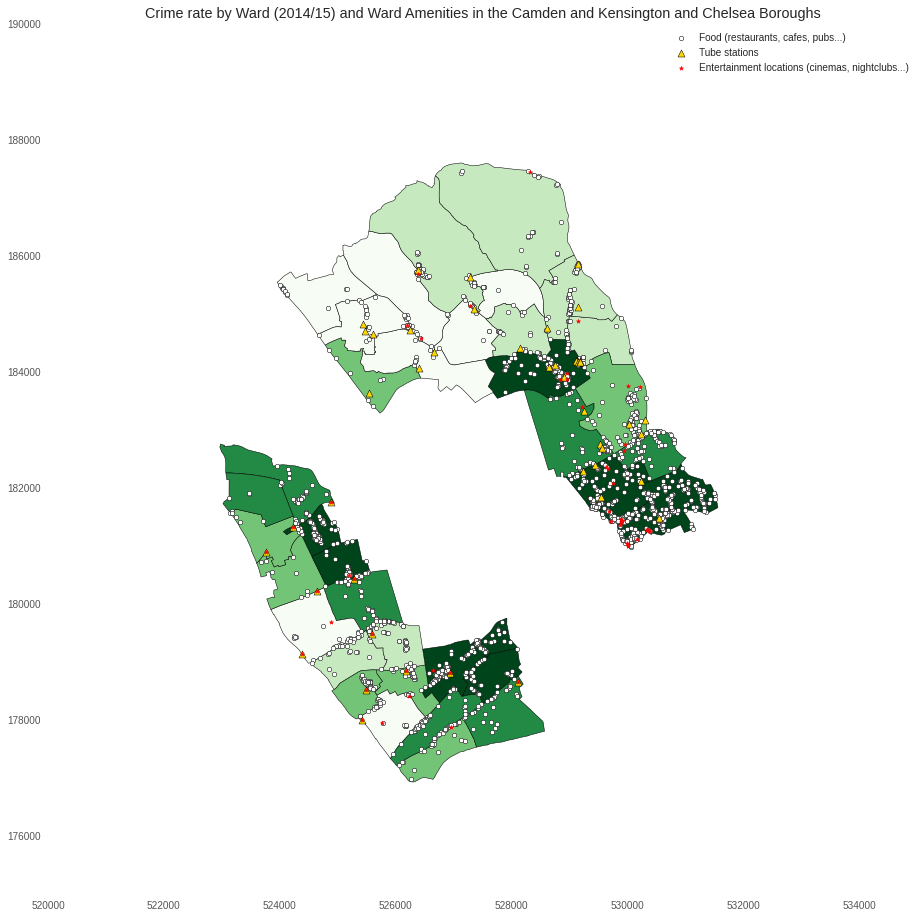

<Figure size 1440x1152 with 0 Axes>

In [50]:

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# set aspect to equal. This is done automatically
# when using *geopandas* plot on it's own, but not when
# working with pyplot directly.
ax.set_aspect('equal')

food.plot(ax=ax, color='white' , markersize=20, edgecolor = "black", zorder=3, label="Food (restaurants, cafes, pubs...)")
stations.plot(ax=ax, marker='^', color='gold', edgecolor="black", zorder=4, label="Tube stations")
entertainment.plot(ax=ax, marker='*', color='red', markersize=18, zorder=5, label="Entertainment locations (cinemas, nightclubs...)")


df_two.plot(ax=ax, column='Crime rate - 2014/15', cmap='Greens', scheme='quantiles', k=5, edgecolor="black", zorder=1,)
plt.title('Crime rate by Ward (2014/15) and Ward Amenities in the Camden and Kensington and Chelsea Boroughs')
plt.xlim(520000,535000)
plt.ylim(175000,190000)
ax.set_facecolor('xkcd:white')


plt.legend()
plt.show()
plt.savefig('crime_amenities.pdf')

In [51]:


import folium
from folium import plugins
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

map = folium.Map(location=[51.5099, -0.1463], zoom_start=12) 

crime_path = "Source8.csv"
crime1 = pd.read_csv(crime_path)
crime1["Longitude"] = crime1.Longitude.astype(float)
crime1["Latitude"] = crime1.Latitude.astype(float)

for index, row in crime1.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], 
                  popup=row['Location'],
                  icon=folium.Icon(icon='cloud')
                 ).add_to(map)
map

# in order for the map to popup on in jupyter notebook comment out the m.save.